In [29]:
#importando as bibliotecas
import pandas as pd  #bibioteca responsável para o tratamento e limpeza dos dados
import numpy as np #biblioteca utilizada para o tratamento eficiente de dados numéricos
import datetime  #biblioteca utilizada para trabalhar com datas
from matplotlib import pyplot as plt  #plotar os gráficos
import seaborn as sns #plot de gráficos

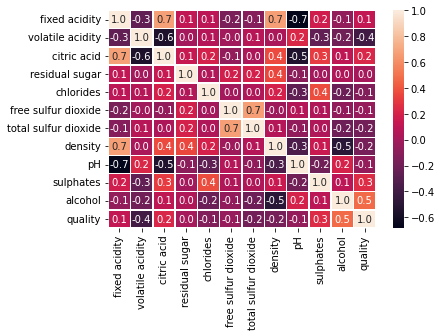

In [30]:
#carregando os dados para o pandas
df_consultas = pd.read_csv('winequality-red.csv', sep=';')
#df_consultas.info()
import seaborn as sn
correlation = df_consultas.corr()
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

In [31]:
#df_consultas.shape
#df_consultas.head(5)
#df_consultas.info()
df_consultas.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
#contando a quantidade de valores distintos em cada uma das colunas
for colunas in list(df_consultas.columns):
  print( "{0:25} {1}".format(colunas, df_consultas[colunas].nunique()) )

fixed acidity             96
volatile acidity          143
citric acid               80
residual sugar            91
chlorides                 153
free sulfur dioxide       60
total sulfur dioxide      144
density                   436
pH                        89
sulphates                 96
alcohol                   65
quality                   6


In [33]:
#selecionando os dados para a construção da previsão
entradas = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH', 'sulphates', 'alcohol']
saida = ['quality']

In [34]:
x = df_consultas[entradas]
#tornando a qualidade do vinho binária > 5 == 1  se não 0
y = []
for index, row in df_consultas[saida].iterrows():
  if row['quality'] > 5:
    y.append(1)
  else:
    y.append(0)

y = pd.DataFrame(np.array(y))

In [35]:
#dividindo a base de dados
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [36]:
#normalizando os dados de treino
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalizado = scaler.transform(x_train)
x_train_normalizado = pd.DataFrame(np.array(x_train_normalizado))
x_train_normalizado.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,0.318584,0.828767,0.00,0.061538,0.115385,0.028169,0.022059,0.483945,0.622047,0.095808,0.384615
1,0.238938,0.253425,0.10,0.130769,0.093645,0.042254,0.029412,0.424312,0.440945,0.083832,0.323077
2,0.362832,0.493151,0.00,0.038462,0.088629,0.323944,0.099265,0.407492,0.417323,0.131737,0.200000
3,0.345133,0.318493,0.18,0.092308,0.110368,0.056338,0.088235,0.506881,0.362205,0.089820,0.215385
4,0.407080,0.301370,0.18,0.053846,0.110368,0.126761,0.055147,0.435015,0.322835,0.095808,0.230769


In [37]:
#exemplo desnormalizando os dados (apenas para saber)
x_train_desnormalizados = scaler.inverse_transform(x_train_normalizado)
x_train_desnormalizados = pd.DataFrame(np.array(x_train_desnormalizados))
x_train_desnormalizados.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,8.2,1.330,0.00,1.7,0.081,3.0,12.0,0.99640,3.53,0.49,10.9
1,7.3,0.490,0.10,2.6,0.068,4.0,14.0,0.99562,3.30,0.47,10.5
2,8.7,0.840,0.00,1.4,0.065,24.0,33.0,0.99540,3.27,0.55,9.7
3,8.5,0.585,0.18,2.1,0.078,5.0,30.0,0.99670,3.20,0.48,9.8
4,9.2,0.560,0.18,1.6,0.078,10.0,21.0,0.99576,3.15,0.49,9.9


In [38]:
#criando modelos

#importando libs
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#normalizando x_test nesse momento para não haver viés de normalização com os dados de treinamento
scaler.fit(x_test)
x_test_normalizado = scaler.transform(x_test)
x_test_normalizado = pd.DataFrame(np.array(x_test_normalizado))

#aplicando um modelo de classificação árvore de decisão
clf_arvore = DecisionTreeClassifier() 
clf_arvore.fit(x_train_normalizado, y_train) 
y_previsto_arvore_decisao = clf_arvore.predict(x_test_normalizado) 

#aplicando um modelo de classificação knn
clf_KNN = KNeighborsClassifier(n_neighbors=5)
clf_KNN.fit(x_train_normalizado, y_train)
y_previsto_KNN = clf_KNN.predict(x_test_normalizado)

#aplicando o modelo Random Forest
clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)
clf_floresta.fit(x_train_normalizado, y_train)
y_previsto_floresta = clf_floresta.predict(x_test_normalizado)

#aplicando o modelo SVM
clf_svm = SVC(gamma='auto',kernel='rbf')
clf_svm.fit(x_train_normalizado, y_train)
y_previsto_SVM = clf_svm.predict(x_test_normalizado)

#aplicando o modelo Rede MLP
hidden_layers = (5,5)
clf_mlp = MLPClassifier(alpha=1e-5, hidden_layer_sizes=hidden_layers, random_state=1)
clf_mlp.fit(x_train_normalizado, y_train)
y_previsto_MLP = clf_mlp.predict(x_test_normalizado)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = co

In [39]:
#vendo as acurácias
from sklearn.metrics import accuracy_score
acuracia_arvore_decisao = accuracy_score(y_test, y_previsto_arvore_decisao)
acuracia_KNN = accuracy_score(y_test, y_previsto_KNN)
acuracia_floresta = accuracy_score(y_test, y_previsto_floresta)
acuracia_SVM = accuracy_score(y_test, y_previsto_SVM)
acuracia_MLP = accuracy_score(y_test, y_previsto_MLP)

#construção da matriz de confusão para facilitar
from sklearn.metrics import classification_report, confusion_matrix
matriz_confusao_arvore_decisao = confusion_matrix(y_test, y_previsto_arvore_decisao)
matriz_confusao_KNN = confusion_matrix(y_test, y_previsto_KNN)
matriz_confusao_floresta = confusion_matrix(y_test, y_previsto_floresta)
matriz_confusao_SVM = confusion_matrix(y_test, y_previsto_SVM)
matriz_confusao_MLP = confusion_matrix(y_test, y_previsto_MLP)

#resultado detalhado da classificação
print('ARVORE DE DECISÃO')
print(classification_report(y_test,y_previsto_arvore_decisao))
print('KNN')
print(classification_report(y_test,y_previsto_KNN))
print('RANDOM FLOREST')
print(classification_report(y_test,y_previsto_floresta))
print('SVM')
print(classification_report(y_test,y_previsto_SVM))
print('MLP')
print(classification_report(y_test,y_previsto_MLP))

ARVORE DE DECISÃO
              precision    recall  f1-score   support

           0       0.64      0.73      0.68       230
           1       0.71      0.62      0.66       250

    accuracy                           0.67       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.68      0.67      0.67       480

KNN
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       230
           1       0.75      0.67      0.71       250

    accuracy                           0.71       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.72      0.71      0.71       480

RANDOM FLOREST
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       230
           1       0.81      0.67      0.73       250

    accuracy                           0.74       480
   macro avg       0.75      0.75      0.74       480
weighted avg       0.75      0.74    

ARVORE DE DECISÃO


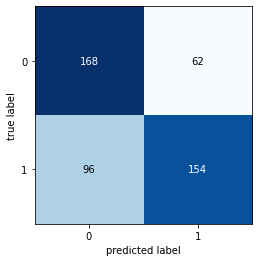

KNN


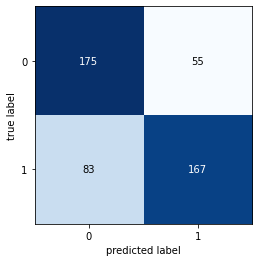

RANDOM FLOREST


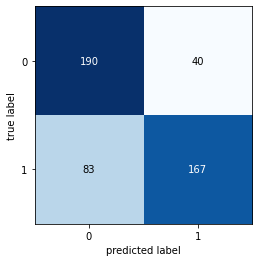

SVM


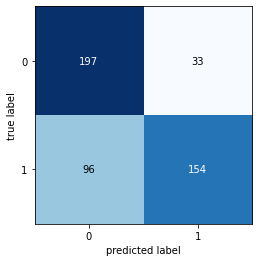

MLP


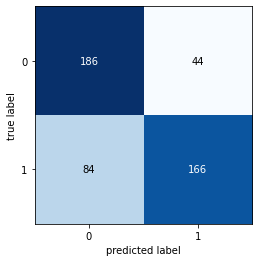

In [40]:
#realiza o plot da matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
print('ARVORE DE DECISÃO')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_arvore_decisao)
plt.show()
print('KNN')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_KNN)
plt.show()
print('RANDOM FLOREST')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_floresta)
plt.show()
print('SVM')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_SVM)
plt.show()
print('MLP')
fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao_MLP)
plt.show()